## Fashion-MNIST数据集

``torch.torchvision``是PyTorch中用来构建计算机视觉模型。``torchvision``主要由以下几部分构成：
* ``torchvision.datasets``: 一些加载数据的函数及常用的数据集接口；
* ``torchvision.models``: 包含常用的模型结构（含预训练模型），例如AlexNet、VGG、ResNet等；
* ``torchvision.transforms``: 常用的图片变换，例如裁剪、旋转等；
* ``torchvision.utils``: 其他的一些有用的方法。

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

1.3.1
0.4.2


使用``torchvision.datasets``下载数据集，借助``transforms.ToTensor``将尺寸为(H x W x C)且数据位于[0, 255]的PIL图片或者数据类型为np.uint8的NumPy数组转换为尺寸为(C x H x W)且数据类型为torch.float32且位于[0.0, 1.0]的Tensor。

**如果用像素值（0-255整数）表示图片数据，那么一律将其类型设置成uint8，避免不必要的bug。**

#### 1 获取数据集

In [2]:
fashion_mnist_train = torchvision.datasets.FashionMNIST(
    root='../data', 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
fashion_mnist_test = torchvision.datasets.FashionMNIST(
    root='../data', 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

#### 2 读取数据集

In [5]:
print(type(fashion_mnist_train))
print(len(fashion_mnist_train), len(fashion_mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


通过下标访问任意样本：

In [6]:
feature, label = fashion_mnist_train[0]
# 原数据集中label是0-9的数字
print(feature.shape, feature.dtype, label)   # channel, height, width

torch.Size([1, 28, 28]) torch.float32 9


In [7]:
# ------------utils------------
# 将数值标签转换为文本标签
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
print(get_fashion_mnist_labels([0, 1, 4]))

['t-shirt', 'trouser', 'coat']


数据集可视化：

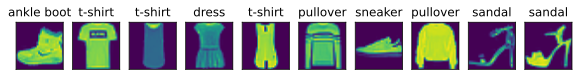

In [8]:
import my_utils
# ------------utils------------
# 在一行里画出多张图像和对应的标签
def show_fashion_mnist(images, labels):
    my_utils.use_svg_display()
    _, figs = plt.subplots(1, len(images), figsize=(10, 10))
    # 一张image和对应的label填充一个fig
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

X, y = [], []
for i in range(10):
    X.append(fashion_mnist_train[i][0])
    y.append(fashion_mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

获得mini-batch数据：

In [9]:
batch_size = 256
num_workers = 4   # 使用多线程来加速数据的读取
train_iter = torch.utils.data.DataLoader(
    fashion_mnist_train, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=num_workers
)
test_iter = torch.utils.data.DataLoader(
    fashion_mnist_test, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=num_workers
)

In [10]:
import time
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

1.39 sec
